In [1]:
import numpy as np
import pandas as pd
import wrangle_anomaly as w

In [2]:
traffic = w.wrangle_web_traffic()

In [3]:
traffic.head()

,page,user_id,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [19]:
year_2019 = traffic.loc['2019']

<AxesSubplot:xlabel='datetime'>

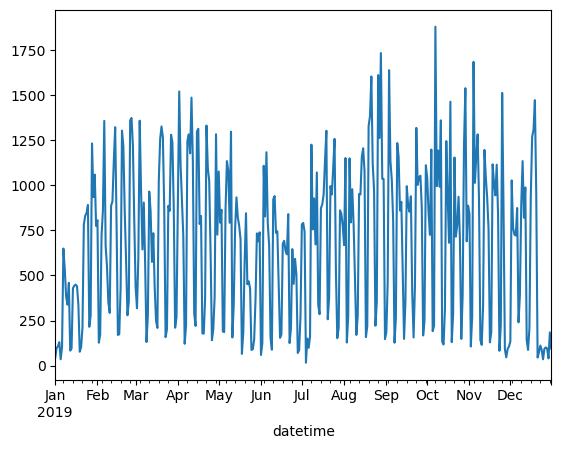

In [21]:
year_2019.page.resample('D').count().plot()

In [23]:
year_2019.cohort.value_counts(dropna=False)

33.0    36472
29.0    36290
32.0    27220
NaN     22861
31.0    22768
28.0    21483
34.0    20068
51.0    16927
27.0    11130
52.0     8735
26.0     7828
14.0     3168
17.0     3074
23.0     1875
24.0     1533
25.0     1003
21.0      939
22.0      922
13.0      596
19.0      289
18.0      216
7.0       186
1.0       148
11.0      125
15.0      111
16.0       66
12.0       40
2.0        16
6.0        14
Name: cohort, dtype: int64

In [114]:
year_2019.groupby('page').ip.count()

page
/                             13143
00_                               9
00_index                         29
01_intro                         53
02_listing_files                 49
                              ...  
web-design/ui/visuals           151
web-design/ux                     1
web-design/ux/layout            155
web-design/ux/layout/.json        1
web-design/ux/purpose           138
Name: ip, Length: 1473, dtype: int64

In [120]:
pages = year_2019.page.str.split('/')

In [121]:
pages

datetime
2019-01-01 07:45:45           [java-iii, mvc]
2019-01-01 12:20:53                      [, ]
2019-01-01 12:56:12                  [java-i]
2019-01-01 12:59:46         [java-i, strings]
2019-01-01 15:25:49         [java-i, methods]
                                ...          
2019-12-31 15:44:41    [java-iii, user-input]
2019-12-31 15:44:41     [java-iii, passwords]
2019-12-31 17:41:42                  [java-i]
2019-12-31 17:41:44      [java-i, console-io]
2019-12-31 22:06:00                      [, ]
Name: page, Length: 246103, dtype: object

In [157]:
pages.index[3]

Timestamp('2019-01-01 12:59:46')

In [156]:
pages[3][0]

'java-i'

In [172]:
page_list=[]
for i in range(len(pages)):
#     page_list['timestamp'] = pages.index[i]
    page_list.append(pages[i][0])

In [177]:
page_list

['java-iii',
 '',
 'java-i',
 'java-i',
 'java-i',
 '',
 'toc',
 'javascript-ii',
 'jquery',
 'jquery',
 '',
 'java-iii',
 'mysql',
 'java-i',
 'java-i',
 'java-i',
 'java-i',
 'java-i',
 'java-i',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-iii',
 'java-ii',
 '',
 'javascript-i',
 'java-iii',
 'java-iii',
 'appendix',
 'java-i',
 '',
 'search',
 'appendix',
 'appendix',
 'search',
 'appendix',
 'search',
 '',
 'content',
 'content',
 'content',
 'content',
 'toc',
 'javascript-ii',
 'javascript-ii',
 'javascript-ii',
 'javascript-ii',
 'content',
 '',
 '',
 'javascript-i',
 'javascript-i',
 'javascript-i',
 '',
 'search',
 'javascript-ii',
 'java-iii',
 'java-iii',
 'java-iii',
 'search',
 'javascript-i',
 'javascript-i',
 'javascript-i',
 'javascript-i',
 'javascript-i',
 'java-i',
 'java-i',
 'java-i',
 '',
 'java-i',
 'java-i',
 '',
 'spring',
 'spring',
 'spring',
 'spring',
 'java-iii',
 'javascript-i

In [175]:
year_2019['lesson'] =page_list

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1505/1473487046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2019['lesson'] =page_list


In [179]:
year_2019.lesson.value_counts().tail(30)

java                                 1
help                                 1
glossary                             1
Explore_Lesson                       1
javascript-with-html                 1
file.dat                             1
ada-capsontes.html                   1
instructors                          1
interview                            1
interview-questions                  1
logouts                              1
cheatsheet.tex                       1
habn                                 1
5.04.04_LeastAngleRegression         1
9.4_DBSCAN_to_detect_anomalies.md    1
sql                                  1
10.00_Intro                          1
interview_questions                  1
10_Projects                          1
10.02.04_EntityLabeling.md           1
11_Intro                             1
11.04_Modeling                       1
11.01.03_Summarize.md                1
7.04.02_Hierarchical                 1
prep_311data_for_module              1
team-setups              

In [ ]:
year_2019[]